In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve, auc
from itertools import product
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")


# PreProcessing and Plotting

In [41]:
# Replace with the correct filename
df = pd.read_csv("credit_risk_dataset.csv")
df_copy = df.copy()


# Drop rows with any missing values (e.g., loan_int_rate, person_emp_length)
df = df.dropna()

training_set_size = 1000
print("shape is: ", df.shape)

print(df['loan_status'].value_counts())

shape is:  (28638, 12)
loan_status
0    22435
1     6203
Name: count, dtype: int64


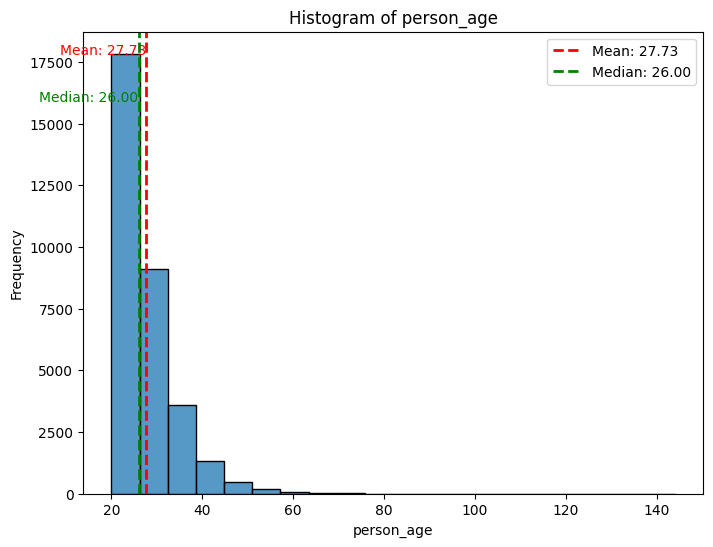

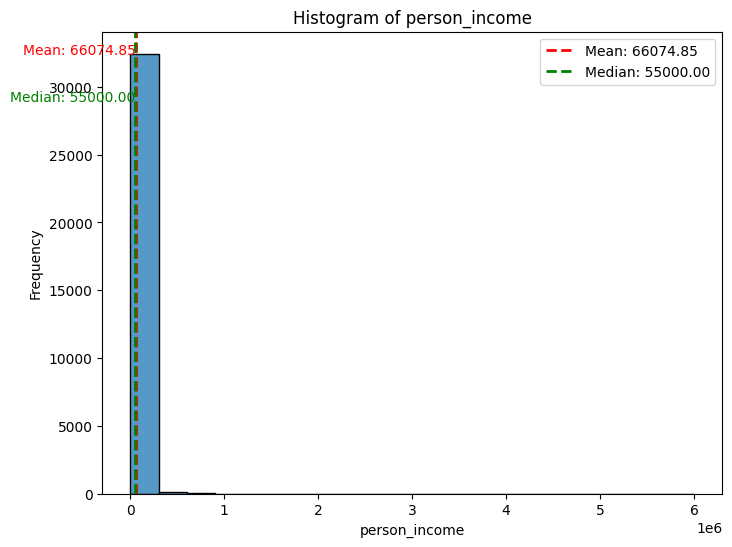

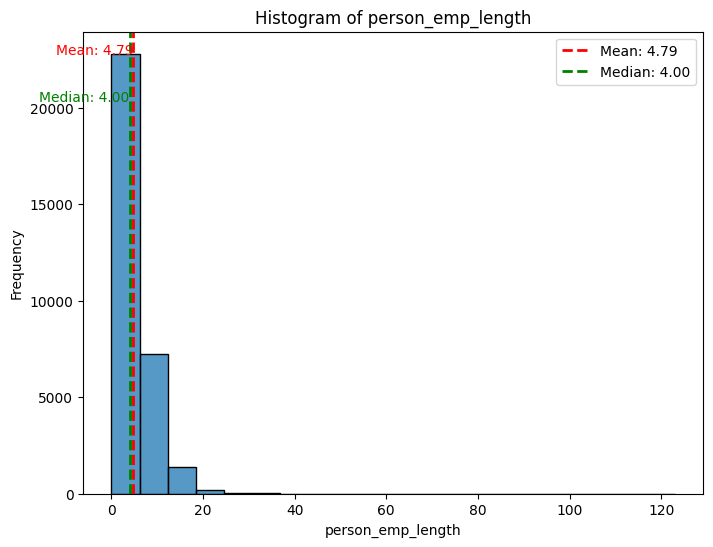

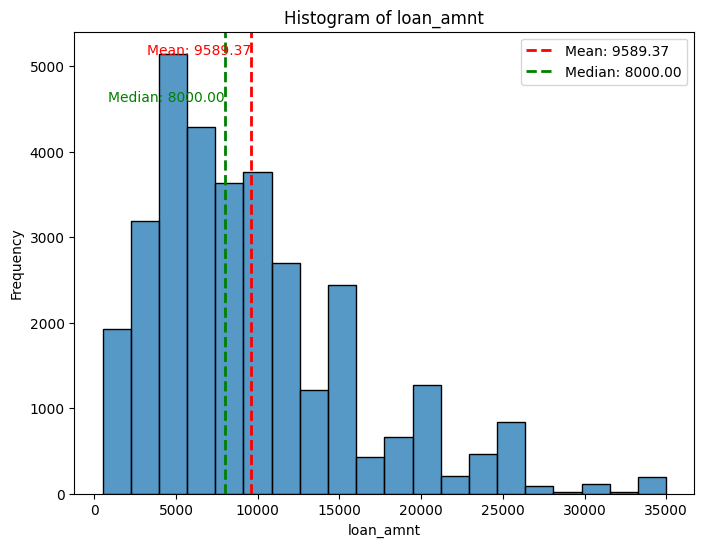

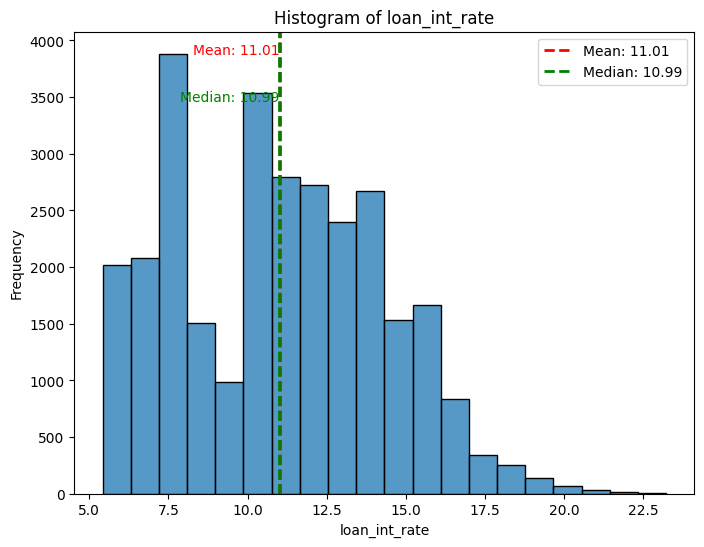

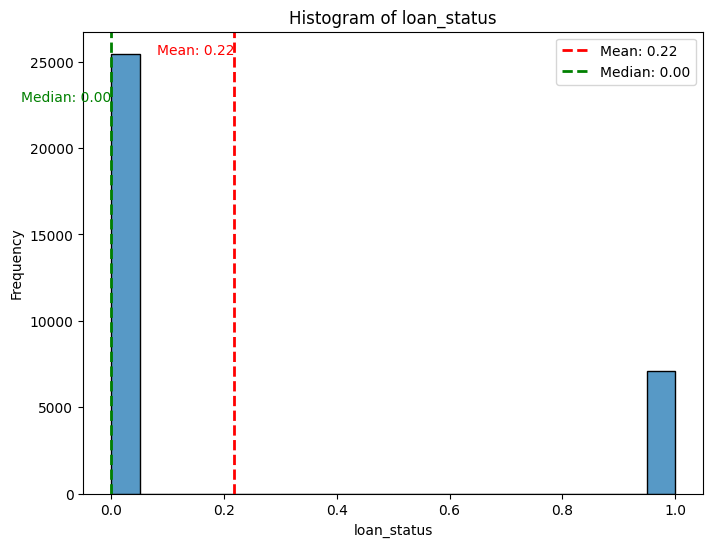

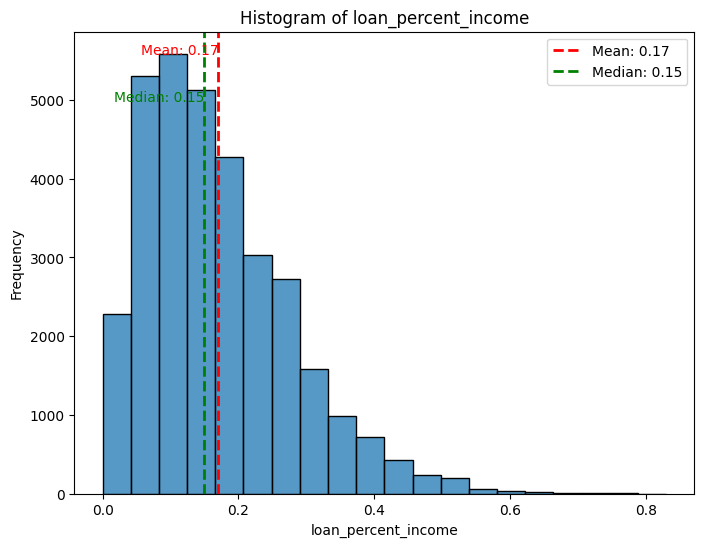

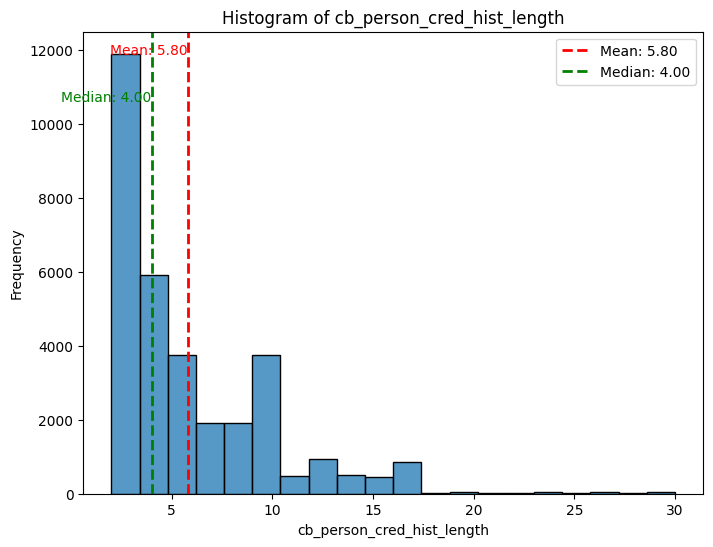

In [42]:
# Plot the histogram for each numerical column
for col in df_copy.select_dtypes(include=['int64', 'float64']):
    plt.figure(figsize=(8, 6))
    sns.histplot(df_copy[col], bins=20)
    plt.title(f'Histogram of {col}')

    # Calculate mean and median
    mean_value = df_copy[col].mean()
    median_value = df_copy[col].median()

    # Add vertical lines for mean and median
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean: {:.2f}'.format(mean_value))
    plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label='Median: {:.2f}'.format(median_value))

    # Label mean and median on the plot
    plt.text(mean_value, plt.gca().get_ylim()[1]*0.95, 'Mean: {:.2f}'.format(mean_value), color='red', ha='right')
    plt.text(median_value, plt.gca().get_ylim()[1]*0.85, 'Median: {:.2f}'.format(median_value), color='green', ha='right')

    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

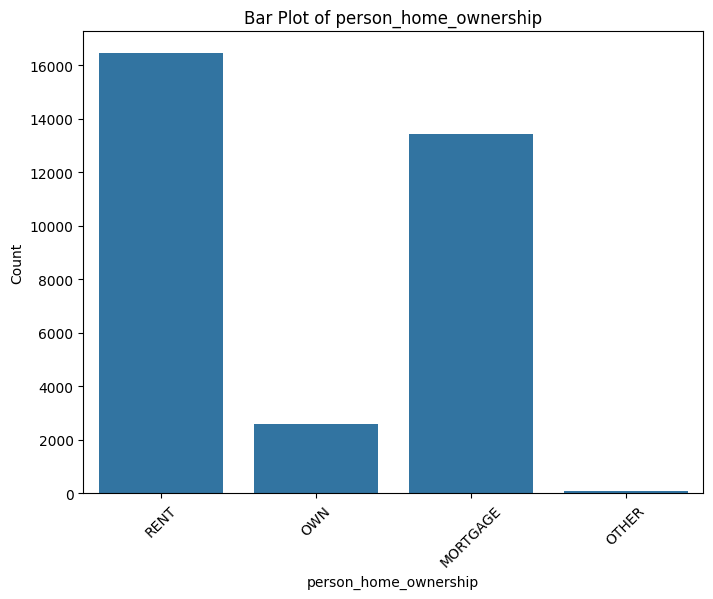

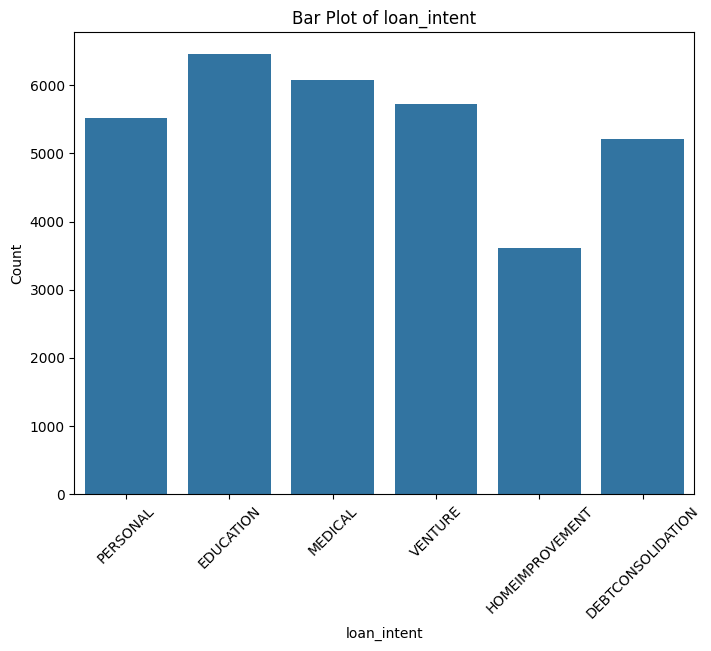

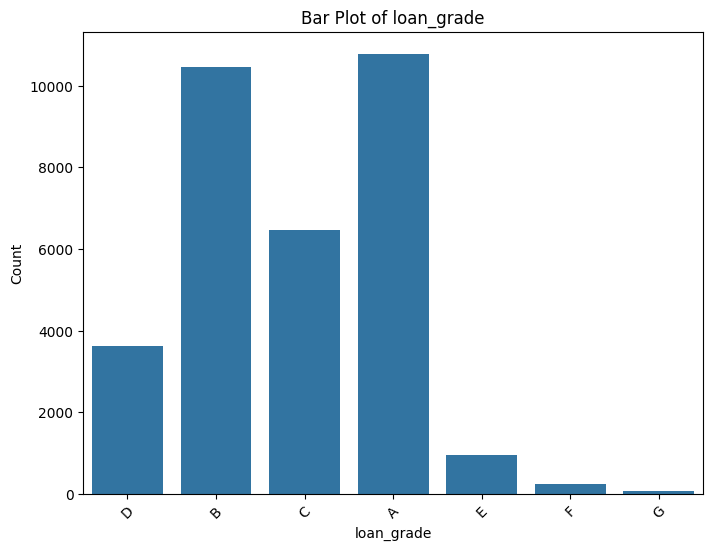

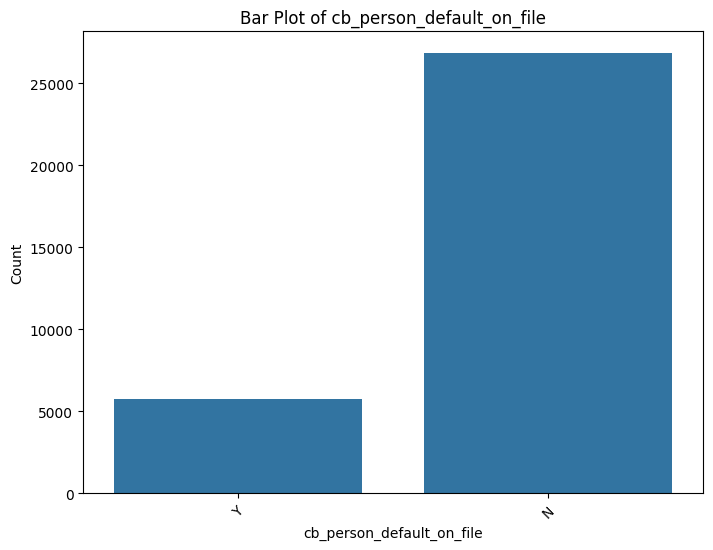

In [43]:
for col in df_copy.select_dtypes(include=['object']):
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df_copy, x=col)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


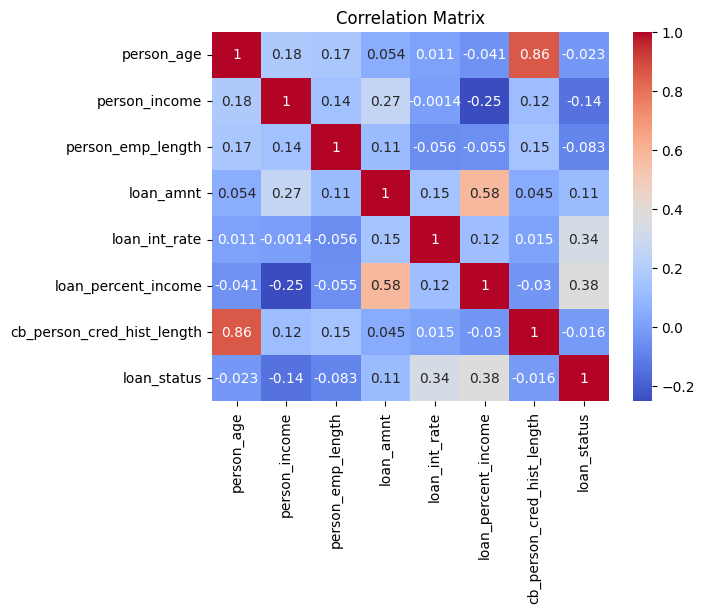

In [44]:
numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
corr_matrix = df[numeric_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [45]:
# Check object columns
print(df.select_dtypes(include='object').columns)
unique_vals_loan_intent = df['loan_intent'].unique()
unique_vals_home_ownership = df['person_home_ownership'].unique()
unique_vals_loan_grade = df['loan_grade'].unique()
unique_vals_file = df['cb_person_default_on_file'].unique()

print("home ownership: ", unique_vals_home_ownership)
print("loan intent: ", unique_vals_loan_intent)
print("loan grade: ", unique_vals_loan_grade)
print( "default on file: ", unique_vals_file)


Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')
home ownership:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER']
loan intent:  ['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']
loan grade:  ['D' 'B' 'C' 'A' 'E' 'F' 'G']
default on file:  ['Y' 'N']


In [46]:


num_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
df


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-0.907594,-0.122674,RENT,28.453433,PERSONAL,D,4.003984,1.542164,1,3.952527,Y,-0.691791
1,-1.066064,-0.914907,OWN,0.050866,EDUCATION,B,-1.367627,0.031008,0,-0.653141,N,-0.939413
2,-0.432183,-0.914907,MORTGAGE,-0.911932,MEDICAL,C,-0.656678,0.566725,1,3.764540,N,-0.691791
3,-0.749123,-0.018433,RENT,-0.189833,MEDICAL,C,4.003984,1.297530,1,3.388567,N,-0.939413
4,-0.590653,-0.196445,RENT,0.772966,MEDICAL,C,4.003984,1.000253,1,3.576554,Y,-0.444169
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,4.638867,-0.218897,MORTGAGE,-0.911932,PERSONAL,C,-0.609282,0.656527,0,-0.559148,N,5.994006
32577,4.163456,0.855590,MORTGAGE,-0.189833,PERSONAL,A,1.258933,-1.099263,0,-0.183175,N,3.270163
32578,5.906629,0.149957,RENT,-0.430533,HOMEIMPROVEMENT,B,4.003984,-0.015442,1,2.730615,N,5.498762
32579,4.480397,1.336704,MORTGAGE,0.050866,PERSONAL,B,0.844213,0.136293,0,-0.653141,N,5.003517


In [47]:
df['cb_person_default_on_file'] = df['cb_person_default_on_file'].map({'Y': 1., 'N': 0.})

# # 2. Ordinal: loan_grade A-G → 1-7
grade_map = {'A': 1., 'B': 2., 'C': 3., 'D': 4., 'E': 5., 'F': 6., 'G': 7.}
df['loan_grade'] = df['loan_grade'].map(grade_map)

ownership_map = {'RENT': 1., 'OWN': 2., 'MORTGAGE': 3., 'OTHER': 4.}
df['person_home_ownership'] = df['person_home_ownership'].map(ownership_map)

intent_map = {'PERSONAL': 1., 'EDUCATION': 2., 'MEDICAL':3., 'VENTURE':4., 'HOMEIMPROVEMENT':5., 'DEBTCONSOLIDATION':6.}
df['loan_intent'] = df['loan_intent'].map(intent_map)

print(df['cb_person_default_on_file'].unique())
print(df['loan_grade'].unique())
print(df['person_home_ownership'].unique())
print(df['loan_intent'].unique())


[1. 0.]
[4. 2. 3. 1. 5. 6. 7.]
[1. 2. 3. 4.]
[1. 2. 3. 4. 5. 6.]


# KNN algos

In [48]:
train_dataset = df.drop("loan_status", axis = 1)[:-training_set_size]
test_dataset = df.drop("loan_status", axis = 1)[-training_set_size:]
train_answers = df["loan_status"][:-training_set_size]
test_answers = df["loan_status"][-training_set_size:]
results_on_knns = {}


Done. Example:
k=5 → train acc: 0.920, test acc: 0.870

Classification Report (KNN k=5):
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       786
           1       0.82      0.50      0.62       214

    accuracy                           0.87      1000
   macro avg       0.85      0.74      0.77      1000
weighted avg       0.87      0.87      0.86      1000



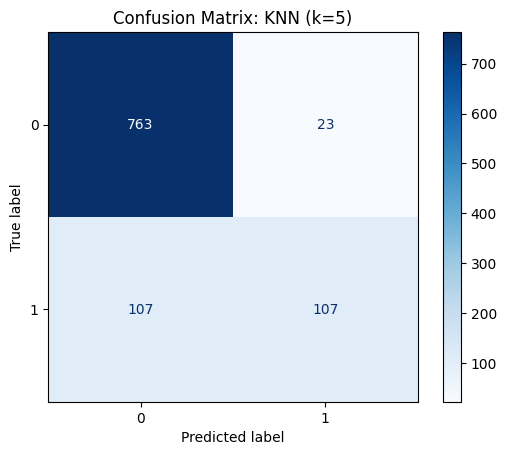

In [49]:
neighbors_to_look_at = 40
results_on_knns = {}
train_results_on_knns = {}

for i in range(1, neighbors_to_look_at + 1):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(train_dataset, train_answers)

    train_accuracy = model_knn.score(train_dataset, train_answers)  # 🟢 Train acc
    test_accuracy = model_knn.score(test_dataset, test_answers)    # 🔵 Test acc

    train_results_on_knns[i] = train_accuracy
    results_on_knns[i] = test_accuracy

print("Done. Example:")
print(f"k=5 → train acc: {train_results_on_knns[5]:.3f}, test acc: {results_on_knns[5]:.3f}")

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(train_dataset, train_answers)
y_pred = model_knn.predict(test_dataset)

# Classification report
print("\nClassification Report (KNN k=5):")
print(classification_report(test_answers, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model_knn, test_dataset, test_answers, cmap='Blues')
plt.title("Confusion Matrix: KNN (k=5)")
plt.show()



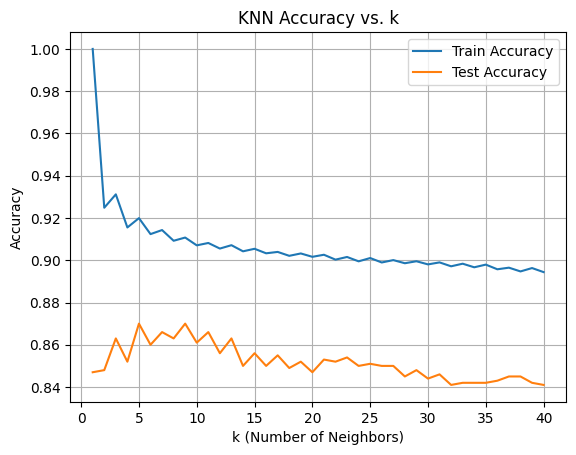

In [50]:
ns = np.array([i for i in range(1, neighbors_to_look_at + 1)])
train_accs = np.array([train_results_on_knns[i] for i in ns])
test_accs = np.array([results_on_knns[i] for i in ns])

plt.plot(ns, train_accs, label='Train Accuracy')
plt.plot(ns, test_accs, label='Test Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.title('KNN Accuracy vs. k')
plt.grid(True)
plt.show()


As expected, KNN achieves perfect accuracy on the training data with k=1, but this results in overfitting and relatively poor generalization to the test set. As k increases, the model becomes less sensitive to individual samples, improving generalization initially but eventually underfitting beyond k ≈ 10."

# Logistics regression

Accuracy: 0.836

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.96      0.90       786
           1       0.73      0.37      0.49       214

    accuracy                           0.84      1000
   macro avg       0.79      0.67      0.70      1000
weighted avg       0.82      0.84      0.81      1000



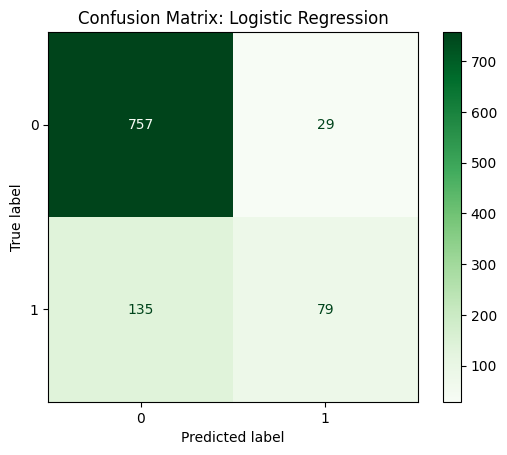

In [51]:
clf = LogisticRegression()
clf.fit(train_dataset, train_answers)
pred_ans = clf.predict(test_dataset)
accuracy = accuracy_score(test_answers, pred_ans)
print(f"Accuracy: {accuracy:.3f}")

# Classification report
print("\nClassification Report (Logistic Regression):")
print(classification_report(test_answers, pred_ans))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, test_dataset, test_answers, cmap='Greens')
plt.title("Confusion Matrix: Logistic Regression")
plt.show()

Polynomial Features Train Accuracy: 0.880
Polynomial Features Accuracy: 0.870

Classification Report (Polynomial Logistic Regression):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       786
           1       0.78      0.55      0.64       214

    accuracy                           0.87      1000
   macro avg       0.83      0.75      0.78      1000
weighted avg       0.86      0.87      0.86      1000



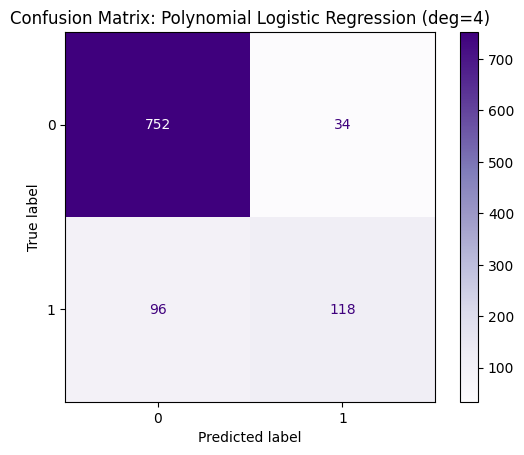

In [52]:
poly = PolynomialFeatures(degree=4, include_bias=False)
train_dataset_poly = poly.fit_transform(train_dataset)
test_dataset_poly = poly.transform(test_dataset)
clf_poly = LogisticRegression()
clf_poly.fit(train_dataset_poly, train_answers) 
pred_ans_poly_test = clf_poly.predict(test_dataset_poly)
pred_ans_poly_train = clf_poly.predict(train_dataset_poly)

accuracy_poly_train = accuracy_score(train_answers, pred_ans_poly_train)
accuracy_poly_test = accuracy_score(test_answers, pred_ans_poly_test)
print(f"Polynomial Features Train Accuracy: {accuracy_poly_train:.3f}")
print(f"Polynomial Features Accuracy: {accuracy_poly_test:.3f}")

# Classification report
print("\nClassification Report (Polynomial Logistic Regression):")
print(classification_report(test_answers, pred_ans_poly_test))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(test_answers, pred_ans_poly_test, cmap='Purples')
plt.title("Confusion Matrix: Polynomial Logistic Regression (deg=4)")
plt.show()

In [53]:
num_of_tests_for_shuffling = 10
all_loss_results = []
for i in range(num_of_tests_for_shuffling):

    
    train_dataset_rand, test_dataset_rand, train_answers_rand, test_answers_rand = train_test_split(
        df.drop("loan_status", axis=1),
        df["loan_status"],
        test_size=1000,     # number of samples in the test set
        shuffle=True
    	)
    clf_rand = LogisticRegression()
    clf_rand.fit(train_dataset_rand, train_answers_rand)
    pred_ans_rand = clf.predict(test_dataset_rand)
    accuracy_rand = accuracy_score(test_answers_rand, pred_ans_rand)
    all_loss_results.append(accuracy_rand)
print(all_loss_results)






[0.854, 0.823, 0.855, 0.837, 0.849, 0.84, 0.842, 0.857, 0.842, 0.849]


In [54]:
all_loss_results_degrees = []
for i in range(num_of_tests_for_shuffling):
    train_dataset_rand, test_dataset_rand, train_answers_rand, test_answers_rand = train_test_split(
        df.drop("loan_status", axis=1),
        df["loan_status"],
        test_size=1000,     # number of samples in the test set
        shuffle=True
    	)
    poly_rand = PolynomialFeatures(degree=4, include_bias=False)
    train_dataset_poly_rand = poly.fit_transform(train_dataset_rand)
    test_dataset_poly_rand = poly.transform(test_dataset_rand)
    clf_poly_rand = LogisticRegression()
    clf_poly_rand.fit(train_dataset_poly_rand, train_answers_rand) 
    pred_ans_poly_rand = clf_poly_rand.predict(test_dataset_poly_rand)
    accuracy_rand_deg = accuracy_score(test_answers_rand, pred_ans_poly_rand)
    all_loss_results_degrees.append(accuracy_rand_deg)
    print(all_loss_results_degrees)

[0.888]
[0.888, 0.872]
[0.888, 0.872, 0.881]
[0.888, 0.872, 0.881, 0.877]
[0.888, 0.872, 0.881, 0.877, 0.869]
[0.888, 0.872, 0.881, 0.877, 0.869, 0.869]
[0.888, 0.872, 0.881, 0.877, 0.869, 0.869, 0.874]
[0.888, 0.872, 0.881, 0.877, 0.869, 0.869, 0.874, 0.888]
[0.888, 0.872, 0.881, 0.877, 0.869, 0.869, 0.874, 0.888, 0.897]
[0.888, 0.872, 0.881, 0.877, 0.869, 0.869, 0.874, 0.888, 0.897, 0.875]


# Random Forest

In [55]:
df1 = pd.read_csv('credit_risk_dataset.csv')
df1.shape

(32581, 12)

In [56]:
df1.fillna(-999, inplace=True)
print(df.shape)
df1.head()

(28638, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [57]:
df1['person_home_ownership'].unique()
df1['loan_intent'].unique()
df1['loan_grade'].unique()
df1['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [58]:
loan_grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
person_home_ownership_mapping = {'OTHER': 1, 'RENT': 2, 'OWN': 3, 'MORTGAGE': 4}
loan_intent_mapping = {
    'DEBTCONSOLIDATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3,
    'PERSONAL': 4, 'EDUCATION': 5, 'VENTURE': 6
}
cb_person_default_on_file_mapping = {'N': 0, 'Y': 1}

df1['loan_grade_encoded'] = df1['loan_grade'].map(loan_grade_mapping)
df1['person_home_ownership_encoded'] = df1['person_home_ownership'].map(person_home_ownership_mapping)
df1['loan_intent_encoded'] = df1['loan_intent'].map(loan_intent_mapping)
df1['cb_person_default_on_file_encoded'] = df1['cb_person_default_on_file'].map(cb_person_default_on_file_mapping)

df1 = df1.drop(columns=['loan_grade', 'person_home_ownership', 'loan_intent', 'cb_person_default_on_file'])
df1.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,loan_grade_encoded,person_home_ownership_encoded,loan_intent_encoded,cb_person_default_on_file_encoded
0,22,59000,123.0,35000,16.02,1,0.59,3,4,2,4,1
1,21,9600,5.0,1000,11.14,0,0.10,2,2,3,5,0
2,25,9600,1.0,5500,12.87,1,0.57,3,3,4,3,0
3,23,65500,4.0,35000,15.23,1,0.53,2,3,2,3,0
4,24,54400,8.0,35000,14.27,1,0.55,4,3,2,3,1


In [59]:
X = df1.drop(columns=['loan_status']) 
y = df1['loan_status'] 

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.9309498235384379

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.96      0.72      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517



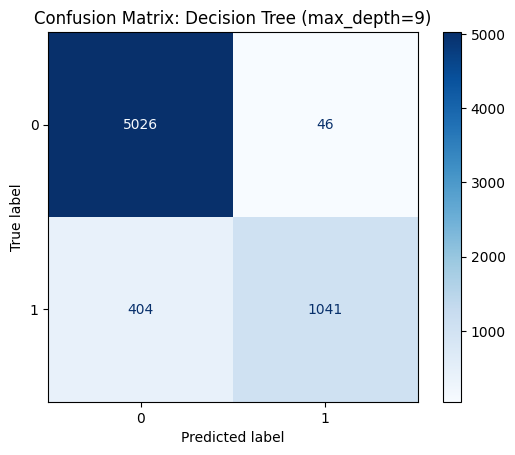

In [61]:
model = DecisionTreeClassifier(random_state=42, max_depth = 9)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix: Decision Tree (max_depth=9)")
plt.show()

Accuracy: 0.9292619303360442

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.97      0.70      0.81      1445

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.92      6517



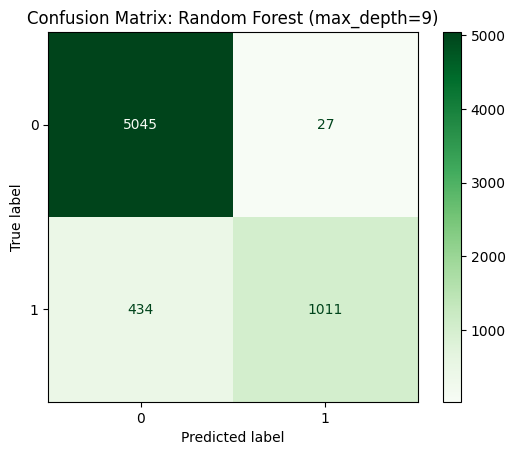

In [62]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=9, max_features=0.5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix: Random Forest (max_depth=9)")
plt.show()

Accuracy: 0.9068589841951818

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      5072
           1       0.96      0.60      0.74      1445

    accuracy                           0.91      6517
   macro avg       0.93      0.80      0.84      6517
weighted avg       0.91      0.91      0.90      6517



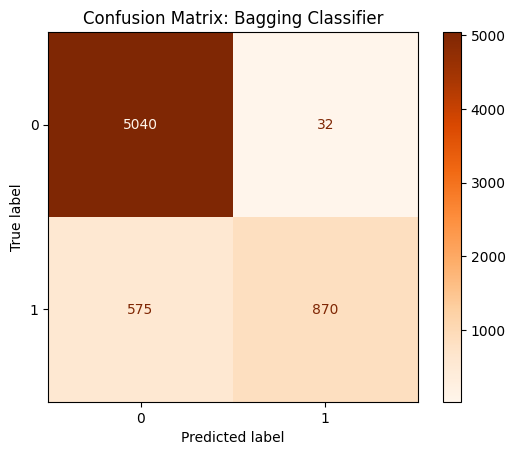

In [63]:
bf_model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=9), n_estimators=100, max_features=0.5, max_samples=0.5, random_state=42)  
bf_model.fit(X_train, y_train)
y_pred = bf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(bf_model, X_test, y_test, cmap='Oranges')
plt.title("Confusion Matrix: Bagging Classifier")
plt.show()

In [64]:
'''
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
'''

'\ngb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)\ngb_model.fit(X_train, y_train)\ny_pred = gb_model.predict(X_test)\nprint("Accuracy:", accuracy_score(y_test, y_pred))\nprint("\nClassification Report:\n", classification_report(y_test, y_pred))\n'

In [65]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=9),
    n_estimators=100,
    max_features=0.5,
    max_samples=0.5,
    random_state=42
)

bbc.fit(X_train, y_train)
y_pred = bbc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
from sklearn.metrics import balanced_accuracy_score, roc_auc_score

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, bbc.predict_proba(X_test)[:,1]))


# Confusion matrix
ConfusionMatrixDisplay.from_estimator(bbc, X_test, y_test, cmap='Purples')
plt.title("Confusion Matrix: Balanced Bagging Classifier")
plt.show()


ModuleNotFoundError: No module named 'imblearn'

# Fixing using SMOTE

In [76]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())

Before SMOTE: loan_status
0    17948
1     4962
Name: count, dtype: int64
After SMOTE: loan_status
0    17948
1    17948
Name: count, dtype: int64


/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


## KNN

KNN Test Accuracy: 0.7715206383305202
              precision    recall  f1-score   support

           0       0.89      0.80      0.85      5072
           1       0.49      0.67      0.56      1445

    accuracy                           0.77      6517
   macro avg       0.69      0.73      0.70      6517
weighted avg       0.80      0.77      0.78      6517

[[4065 1007]
 [ 482  963]]


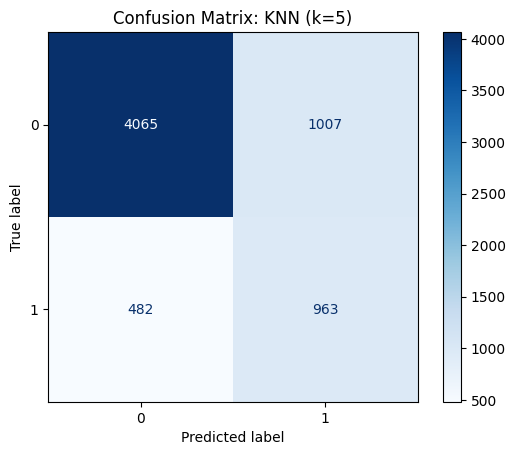

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_sm, y_train_sm)

y_pred = model_knn.predict(X_test)

print("KNN Test Accuracy:", model_knn.score(X_test, y_test))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Confusion matrix plot
ConfusionMatrixDisplay.from_estimator(model_knn, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix: KNN (k=5)")
plt.show()

## Logistic

Logistic Regression Accuracy: 0.780

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.92      0.79      0.85      4487
           1       0.49      0.75      0.59      1241

    accuracy                           0.78      5728
   macro avg       0.71      0.77      0.72      5728
weighted avg       0.83      0.78      0.79      5728



/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


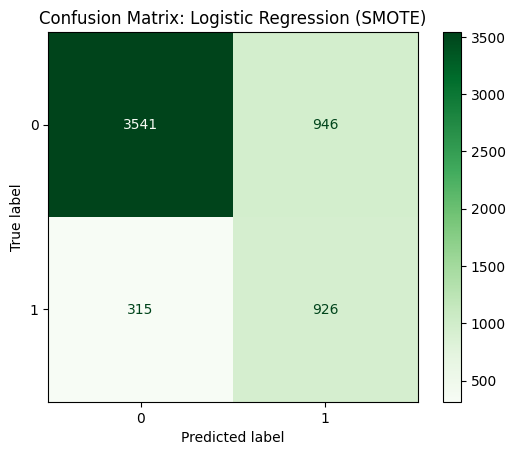

Polynomial Features Train Accuracy: 0.848
Polynomial Features Test Accuracy: 0.859

Classification Report (Polynomial Features):
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      4487
           1       0.66      0.73      0.69      1241

    accuracy                           0.86      5728
   macro avg       0.79      0.81      0.80      5728
weighted avg       0.87      0.86      0.86      5728



/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


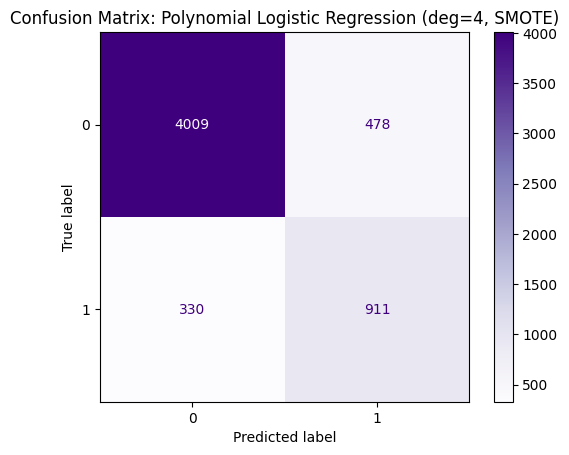

In [89]:
# Split the data first
X = df.drop("loan_status", axis=1)
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# ===== ORIGINAL CODE STARTS HERE =====

# Logistic Regression without polynomial features
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_sm, y_train_sm)
pred_ans = clf.predict(X_test)
accuracy = accuracy_score(y_test, pred_ans)
print(f"Logistic Regression Accuracy: {accuracy:.3f}")
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, pred_ans))

# Confusion matrix for plain logistic regression
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix: Logistic Regression (SMOTE)")
plt.show()


# Polynomial Features (degree 4)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train_sm)
X_test_poly = poly.transform(X_test)

clf_poly = LogisticRegression(max_iter=1000)
clf_poly.fit(X_train_poly, y_train_sm)
pred_ans_poly_test = clf_poly.predict(X_test_poly)
pred_ans_poly_train = clf_poly.predict(X_train_poly)

accuracy_poly_train = accuracy_score(y_train_sm, pred_ans_poly_train)
accuracy_poly_test = accuracy_score(y_test, pred_ans_poly_test)
print(f"Polynomial Features Train Accuracy: {accuracy_poly_train:.3f}")
print(f"Polynomial Features Test Accuracy: {accuracy_poly_test:.3f}")
print("\nClassification Report (Polynomial Features):")
print(classification_report(y_test, pred_ans_poly_test))

# Confusion matrix for polynomial logistic regression
ConfusionMatrixDisplay.from_predictions(y_test, pred_ans_poly_test, cmap='Purples')
plt.title("Confusion Matrix: Polynomial Logistic Regression (deg=4, SMOTE)")
plt.show()

# Random Forest

Decision Tree Accuracy: 0.8896731624980819

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5072
           1       0.76      0.74      0.75      1445

    accuracy                           0.89      6517
   macro avg       0.84      0.84      0.84      6517
weighted avg       0.89      0.89      0.89      6517



/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


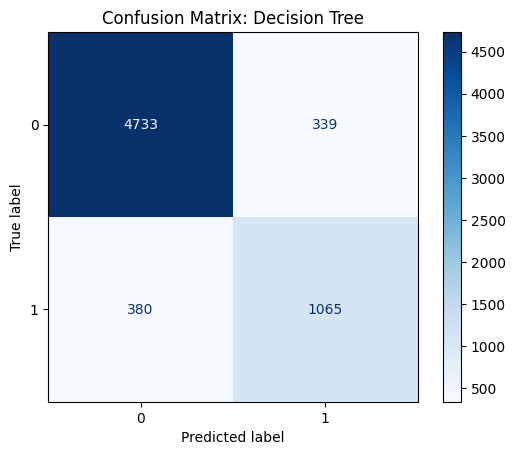

Random Forest Accuracy: 0.8942765075955195

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      5072
           1       0.77      0.75      0.76      1445

    accuracy                           0.89      6517
   macro avg       0.85      0.84      0.85      6517
weighted avg       0.89      0.89      0.89      6517

ROC AUC: 0.9087178539071965


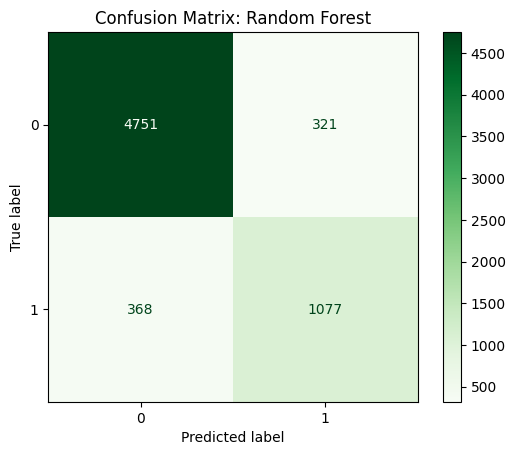

Bagging Classifier Accuracy: 0.8813871413226945

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      5072
           1       0.72      0.75      0.74      1445

    accuracy                           0.88      6517
   macro avg       0.83      0.83      0.83      6517
weighted avg       0.88      0.88      0.88      6517

ROC AUC: 0.9088460425922085


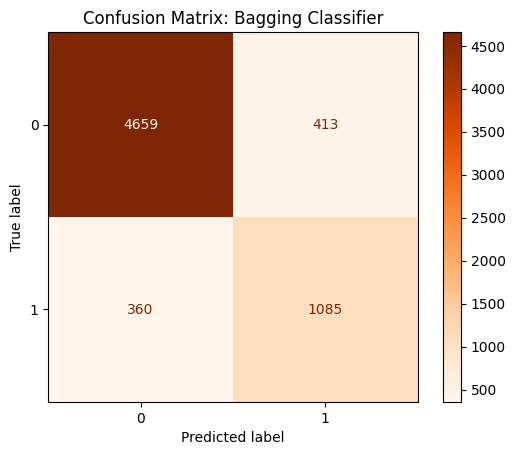

/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ynakhla/Library/Python/3.9/lib/python/site-packages/s

Balanced Bagging Accuracy: 0.8657357679914071

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91      5072
           1       0.67      0.79      0.72      1445

    accuracy                           0.87      6517
   macro avg       0.80      0.84      0.82      6517
weighted avg       0.88      0.87      0.87      6517

Balanced Accuracy: 0.8400048983222905
ROC AUC: 0.9166796742820341


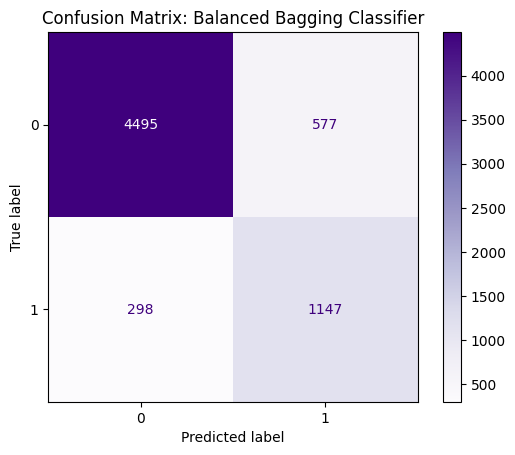

In [90]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, roc_auc_score

# 1. Preprocessing and SMOTE setup
X = df1.drop(columns=['loan_status']) 
y = df1['loan_status'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# 2. Decision Tree
model = DecisionTreeClassifier(random_state=42, max_depth=9)
model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- Confusion Matrix: Decision Tree ---
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix: Decision Tree")
plt.show()


# 3. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=9, max_features=0.5, random_state=42)
rf_model.fit(X_train_sm, y_train_sm)
y_pred = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


# --- Confusion Matrix: Random Forest ---
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Greens')
plt.title("Confusion Matrix: Random Forest")
plt.show()


# 4. Bagging Classifier
bf_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=9),
    n_estimators=100,
    max_features=0.5,
    max_samples=0.5,
    random_state=42
)
bf_model.fit(X_train_sm, y_train_sm)
y_pred = bf_model.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, bf_model.predict_proba(X_test)[:, 1]))

# --- Confusion Matrix: Bagging Classifier ---
ConfusionMatrixDisplay.from_estimator(bf_model, X_test, y_test, cmap='Oranges')
plt.title("Confusion Matrix: Bagging Classifier")
plt.show()



# 5. Balanced Bagging Classifier (already handles imbalance internally, no SMOTE needed)
bbc = BalancedBaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=9),
    n_estimators=100,
    max_features=0.5,
    max_samples=0.5,
    random_state=42
)
bbc.fit(X_train, y_train)  # Original (imbalanced) data
y_pred = bbc.predict(X_test)
print("Balanced Bagging Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, bbc.predict_proba(X_test)[:,1]))

# --- Confusion Matrix: Balanced Bagging ---
ConfusionMatrixDisplay.from_estimator(bbc, X_test, y_test, cmap='Purples')
plt.title("Confusion Matrix: Balanced Bagging Classifier")
plt.show()
